# EDA

## 1. IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

## 2. IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/Oscar/OneDrive - FM4/Escritorio/Python Data Mastery/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS/001_LEAD SCORING'

Nombres de los ficheros de datos.

In [3]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [4]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

## 3. EDA CATEGÓRICAS

In [5]:
cat

,origen,fuente,no_enviar_email,no_llamar,ult_actividad,ambito,ocupacion,conociste_google,conociste_periodico,conociste_facebook,conociste_referencias,descarga_lm
id,,,,,,,,,,,,
660728,API,Organic Search,No,No,Email Opened,Select,Unemployed,No,No,No,No,No
660727,Landing Page Submission,Direct Traffic,No,No,Email Opened,Business Administration,Student,No,No,No,No,Yes
660719,Landing Page Submission,Direct Traffic,No,No,OTROS,Media and Advertising,Unemployed,No,No,No,No,No
660681,Landing Page Submission,Google,No,No,Converted to Lead,Select,Unemployed,No,No,No,No,No
660673,Landing Page Submission,Google,No,No,Email Opened,Supply Chain Management,Unemployed,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
579564,Landing Page Submission,Direct Traffic,Yes,No,OTROS,IT Projects Management,Unemployed,No,No,No,No,No
579546,Landing Page Submission,Direct Traffic,No,No,SMS Sent,Media and Advertising,Unemployed,No,No,No,No,Yes
579545,Landing Page Submission,Direct Traffic,Yes,No,SMS Sent,Business Administration,Unemployed,No,No,No,No,Yes


### 3.1. Análisis estadístico

In [6]:
def frecuencias_cat(df_cat):
    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [7]:
frecuencias_cat(cat)
#Aparecerá una lista de todas las variables con su frecuencia asociada

,Variable,Valor,Frecuencia
27,ambito,International Business,0.024119
29,ambito,Media and Advertising,0.025627
34,ambito,Travel and Tourism,0.026946
22,ambito,"Banking, Investment And Insurance",0.042962
26,ambito,IT Projects Management,0.045223
33,ambito,Supply Chain Management,0.047673
23,ambito,Business Administration,0.050876
31,ambito,Operations Management,0.064820
30,ambito,OTROS,0.083098
28,ambito,Marketing Management,0.104390


In [ ]:
'''
La lectura que sacamos del análisis estadístico es que debemos borrar:

- Las variables de "conociste_" porque no nos están aportando información
- Los registros del grupo de personas que no quieren que les contactemos ni por teléfono, ni email 
    Isaac dice que hay que eliminar: (no_llamar:OTROS) AND (no_enviar_email:Yes)
    Yo digo que es el grupo de personas que se dan ambos casos al mismo tiempo: (no_llamar:OTROS) OR (no_enviar_email:Yes)
    pero no hay ninguno que diga que no se le contacte por email ni teléfono al mismo tiempo, así que hacemos la otra opción
- Los registros de ult_actividad:Email Bounced porque son personas que han puesto datos falsos solo para entrar en la 
    descarga o web pero que obviamente no les vamos a vender nada
'''

In [8]:
#Nos quedamos con los registros que cumplen con lo que necesitamos que son los que quieren que les contactemos y con email 
#bueno y eliminamos las variables que habíamos dicho que no tenían sentido y tambien las de contacto porque todos registros 
#que nos quedan en cat aceptan contactos email o telefono, por lo que ya no son variables, si no constantes
cat = cat.loc[(cat['no_enviar_email']!='Yes') & (cat['no_llamar']!='OTROS') & (cat['ult_actividad']!='Email Bounced')]\
    .drop(columns = ['conociste_facebook', 
                     'conociste_google', 
                     'conociste_periodico', 
                     'conociste_referencias', 
                     'no_llamar',
                     'no_enviar_email'])
cat

,origen,fuente,ult_actividad,ambito,ocupacion,descarga_lm
id,,,,,,
660728,API,Organic Search,Email Opened,Select,Unemployed,No
660727,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Yes
660719,Landing Page Submission,Direct Traffic,OTROS,Media and Advertising,Unemployed,No
660681,Landing Page Submission,Google,Converted to Lead,Select,Unemployed,No
660673,Landing Page Submission,Google,Email Opened,Supply Chain Management,Unemployed,No
...,...,...,...,...,...,...
579642,Landing Page Submission,Direct Traffic,SMS Sent,Human Resource Management,Unemployed,Yes
579622,API,Direct Traffic,SMS Sent,Select,Unemployed,No
579546,Landing Page Submission,Direct Traffic,SMS Sent,Media and Advertising,Unemployed,Yes


In [9]:
#Eliminamos los mismos registros en num que hemos eliminado en cat
num = num[num.index.isin(cat.index)]
num

,compra,visitas_total,tiempo_en_site_total,paginas_vistas_visita,score_actividad,score_perfil
id,,,,,,
660728,0,5,674,2.5,15.0,15.0
660727,1,2,1532,2.0,14.0,20.0
660719,0,1,305,1.0,13.0,17.0
660681,1,2,1428,1.0,15.0,18.0
660673,1,2,1640,2.0,14.0,20.0
...,...,...,...,...,...,...
579642,0,2,1770,2.0,14.0,20.0
579622,1,13,1409,2.6,14.0,17.0
579546,0,2,238,2.0,14.0,19.0


### 3.2. Análisis gráfico

In [10]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

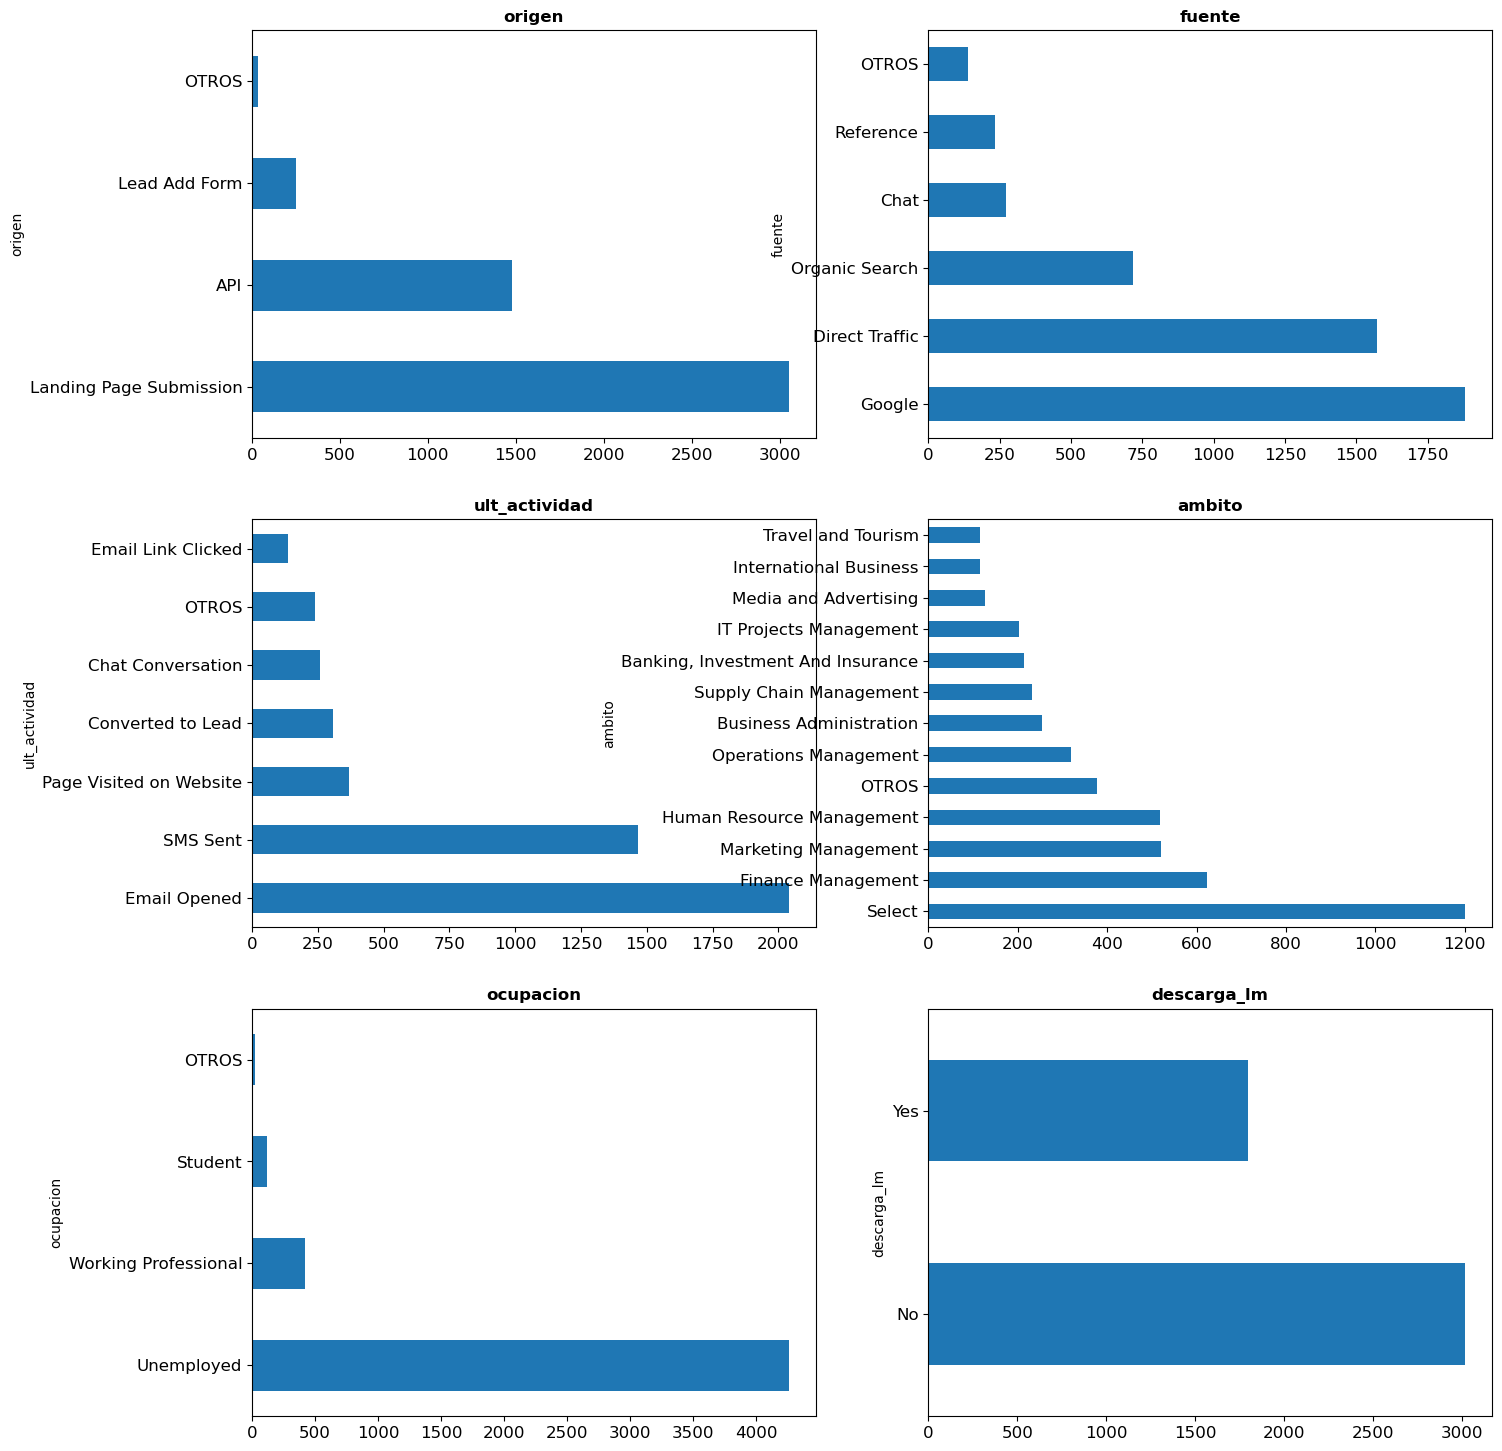

In [11]:
graficos_eda_categoricos(cat)

## 4. EDA NUMÉRICAS

### 4.1. Análisis estadístico

In [12]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [13]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
compra,4817.0,0.415404,0.0,0.492843,0.0,0.0,0.0,1.0,1.0
visitas_total,4817.0,4.122483,3.0,3.428728,0.0,2.0,3.0,5.0,50.0
tiempo_en_site_total,4817.0,605.294789,364.0,555.373635,0.0,130.0,364.0,1089.0,2272.0
paginas_vistas_visita,4817.0,2.893403,2.5,1.916449,0.0,2.0,2.5,4.0,16.0
score_actividad,4817.0,14.054183,14.0,0.928603,9.0,14.0,14.0,14.0,18.0
score_perfil,4817.0,16.746523,17.0,1.428349,11.0,16.0,17.0,17.0,20.0


In [14]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 660728 to 579533
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   compra                 4817 non-null   int64  
 1   visitas_total          4817 non-null   Int64  
 2   tiempo_en_site_total   4817 non-null   int64  
 3   paginas_vistas_visita  4817 non-null   float64
 4   score_actividad        4817 non-null   float64
 5   score_perfil           4817 non-null   float64
dtypes: Int64(1), float64(3), int64(2)
memory usage: 268.1 KB


### 4.2. Análisis gráfico

In [15]:
def graficos_eda_continuas(num):
    
    # Filtrar solo columnas numéricas
    num = num.select_dtypes(include=['int64', 'float64'])

    # Verificar si hay columnas numéricas
    if num.shape[1] == 0:
        print("No hay columnas numéricas para graficar.")
        return
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

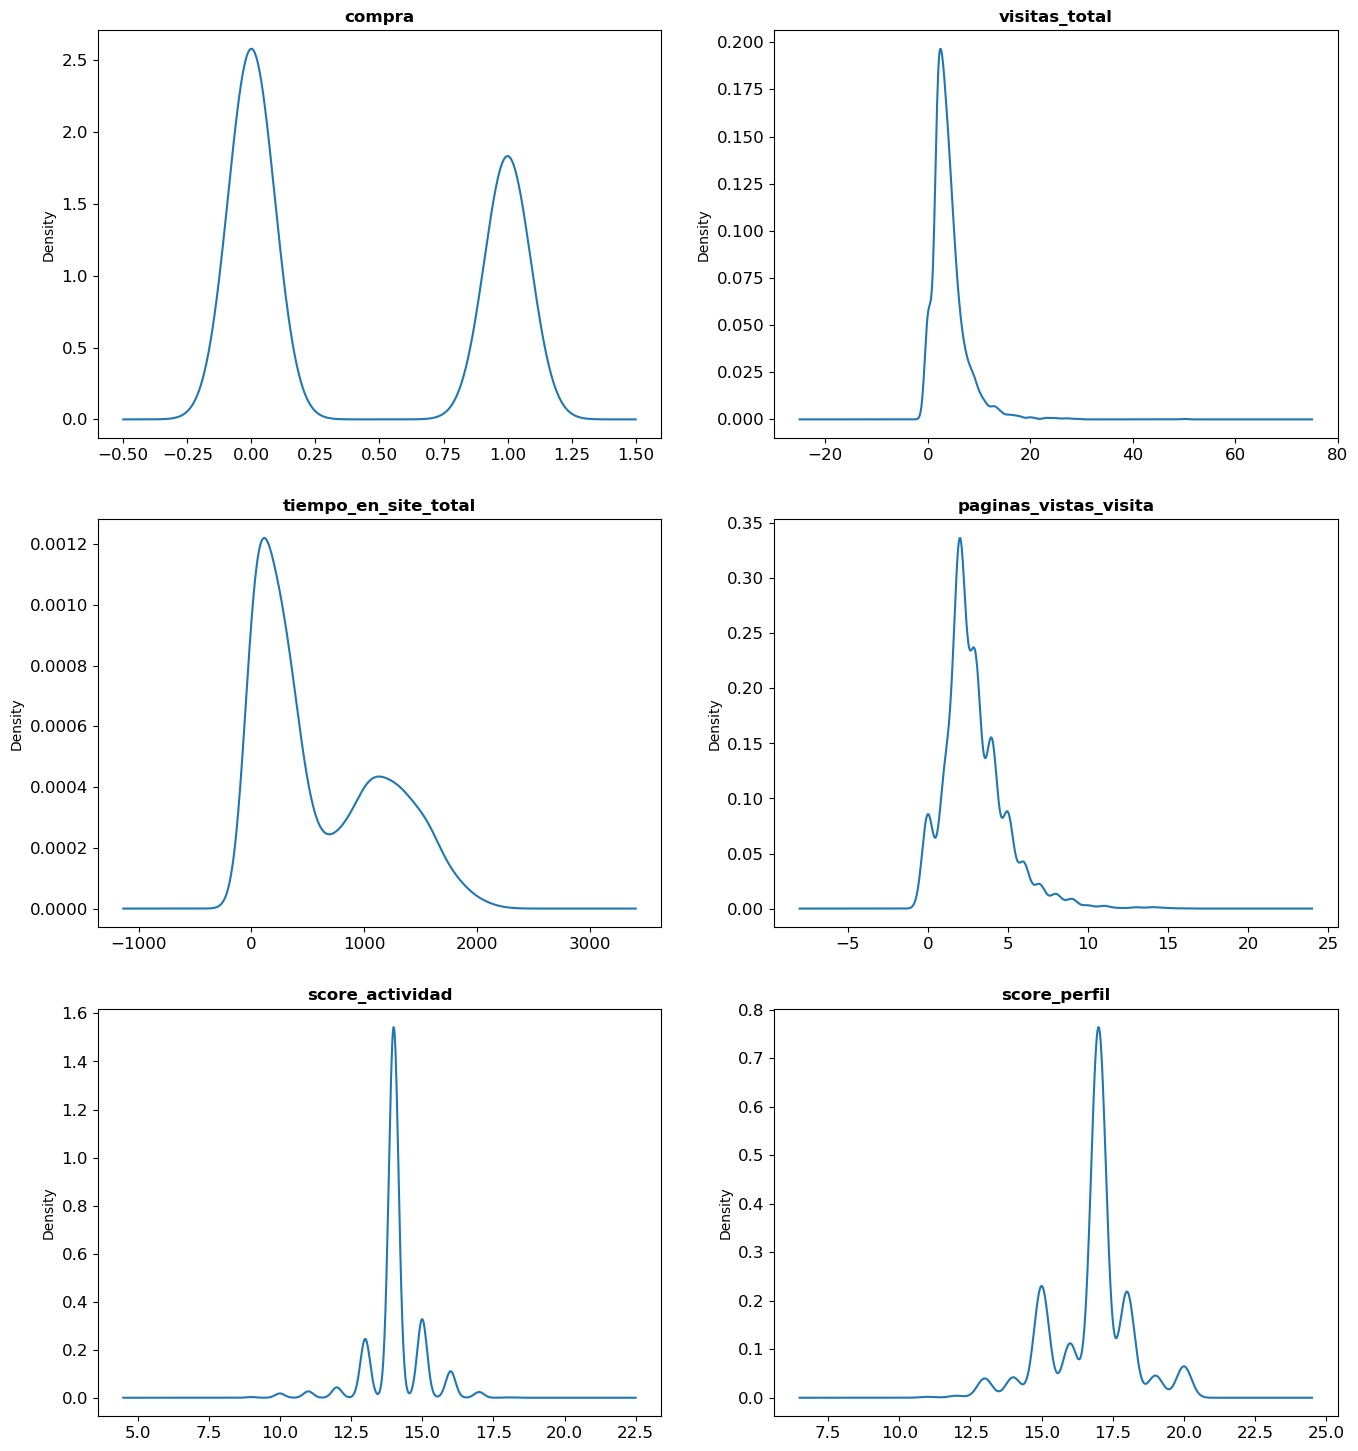

In [16]:
graficos_eda_continuas(num)
#Vemos que las distribuciones de las variables son aproximadamente normales por lo que probablemente no hará falta hacer
#el proceso de normalización de las variables

In [18]:
num = num.reset_index()
cat = cat.reset_index()

## 5. GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guarda los avances en cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

*NOTA: En algunos casos no hay cambios en los ficheros en esta fase, así que este paso es opcional.Pero si no guardas estos ficheros acuérdate de modificar la importación en el siguiente notebook.*

In [20]:
#Definir los nombres de los archivos
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [21]:
#Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)